In [1]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities
import collections
from IPython.display import HTML
import numpy as np
import urllib3
import time
import operator
import socket
import cPickle
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

GREEN = "#77DD77"

In [2]:
# reading the file with data
text_file = open('HS-LC.txt', 'r')
lines = text_file.readlines()

G = nx.Graph()
num_of_nodes = 0
num_of_edges = 0

# parsing file and building graph from obtained data
def parseLine(line):
    return line.split()

for line in lines:
    num_of_edges = num_of_edges+1
    parsed = parseLine(line)
    weight = float(parsed[2])
    G.add_edge(parsed[0], parsed[1], weight=weight)

In [3]:
# printing the network       
#pos = nx.spring_layout(G, iterations=200)
#nx.draw_networkx_edges(G, pos, width=1, alpha=0.4)
#nx.draw_networkx_nodes(G, pos, node_color=GREEN, node_size=10, alpha=1, linewidths=0.5)
#lbls = nx.draw_networkx_labels(G, pos) 
#plt.show()        

In [4]:
# number of nodes
num_of_nodes = G.number_of_nodes()

print "number of nodes: " + str(num_of_nodes)

# number of edges
num_of_edges = G.number_of_edges()

print "number of edges: " + str(num_of_edges)

number of nodes: 4227
number of edges: 39484


In [5]:
# average degree of the network
degrees = []
degsum = 0
avgdeg = 0

degrees = nx.degree(G)

for node in degrees:
    degsum = degsum+node[1]

avgdeg = degsum/num_of_nodes

print "average degree: " + str(avgdeg)

average degree: 18


In [6]:
# density
density = 0
density = nx.density(G)

print "density: " + str(density)

density: 0.0044206832533


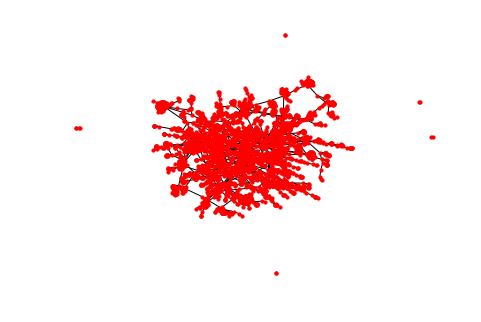

In [7]:
# minimum spanning tree
msp = nx.minimum_spanning_tree(G)

nx.draw(msp, node_size=10)

Text(0,0.5,u'Number of Nodes')

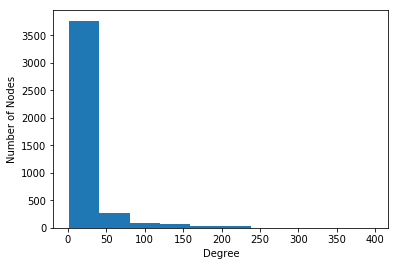

In [8]:
# degree distribution histogram
list_of_degrees = []

for deg in degrees:
    list_of_degrees.append(deg[1])
    
plt.hist(list_of_degrees)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

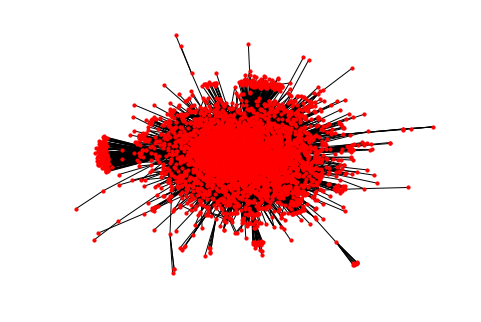

In [9]:
# largest connected component of the network
LC = max(nx.connected_component_subgraphs(G), key=len)

nx.draw(LC, node_size=10)

In [10]:
# diameter
diameter = nx.diameter(LC)

print "diameter: " + str(diameter)

diameter: 8


In [11]:
# graph center of largest connected component
center = nx.center(LC)

print "graph center contains " + str(len(center)) + " nodes"
print "center: " + str(center)

graph center contains 405 nodes
center: ['ZK131.7', 'ZK131.6', 'ZK131.5', 'ZK131.4', 'ZK131.3', 'ZK131.2', 'ZK131.1', 'ZK131.9', 'ZK131.8', 'ZK1098.1', 'K06C4.4', 'T02G5.9', 'Y47G6A.13', 'Y119D3B.17', 'ZC168.4', 'T24C4.1', 'C47E8.5', 'R12B2.2', 'R12B2.1', 'F54C9.1', 'ZK1127.6', 'ZK1127.9', 'F43E2.8', 'R09E12.3', 'Y73B6BL.9', 'F28F8.6', 'ZK742.1', 'T22B7.1', 'C09G12.8', 'B0393.1', 'Y37D8A.9', 'C08B11.5', 'R10E11.1', 'F55D12.4', 'Y110A2AL.13', 'R07G3.1', 'B0464.7', 'B0464.2', 'ZC302.1', 'T01C3.10', 'ZK131.10', 'E04F6.15', 'F26B1.2', 'C07G2.2', 'R06A4.4', 'C39E9.13', 'C10E2.3', 'R05G6.7', 'F40F8.8', 'C50F4.7', 'C50F4.5', 'C26D10.2', 'T20B5.1', 'F28B12.3', 'ZK593.6', 'ZK1240.8', 'ZK1240.9', 'ZK1240.3', 'Y41E3.11', 'C48G7.3', 'Y111B2A.16', 'Y71F9AL.18', 'ZK973.9', 'H34C03.2', 'F26D10.3', 'K12D12.1', 'T28A8.7', 'T23D8.5', 'T23D8.6', 'Y119C1B.8', 'Y110A7A.19', 'Y110A7A.10', 'E04F6.5', 'E04F6.7', 'T05C12.7', 'F02A9.4', 'T19B10.6', 'K10H10.6', 'K10H10.3', 'C02C6.1', 'C15H11.7', 'B0403.4', 'T21B

In [12]:
# number of clique communities of 3 nodes
num_of_clique_communities = k_clique_communities(LC, 3)

print "number of clique communities of 3 nodes: " + str(len(list(num_of_clique_communities)))

number of clique communities of 3 nodes: 104


In [13]:
# protein with the highest potential to effect the rest of the network when changed is the one with
# the most connections, therefore the node with the highest degree (within largest connected comp.)
all_degrees = nx.degree(LC)
dict_of_degrees = dict(all_degrees)
protein_name = max(dict_of_degrees.iterkeys(), key=(lambda key: dict_of_degrees[key]))

print "protein name: " + protein_name

protein name: C42D8.8
